# Telecom X – Parte 2: Prevendo Churn - Pipeline de Modelagem Otimizado

Este notebook apresenta um pipeline otimizado para a previsão de churn na Telecom X, focado em concisão e eficiência. Ele integra as etapas essenciais de pré-processamento, análise, modelagem e interpretação, com base nos objetivos do desafio e nas melhores práticas.

## 🎯 Missão
Desenvolver modelos preditivos para prever clientes com alta chance de churn, permitindo antecipar e mitigar a evasão.

## 🧠 Objetivos
1.  Preparar dados (tratamento, encoding, normalização).
2.  Analisar correlação e selecionar variáveis.
3.  Treinar ≥2 modelos de classificação.
4.  Avaliar desempenho dos modelos.
5.  Interpretar resultados e importância das variáveis.
6.  Concluir estrategicamente sobre fatores de evasão.

---

## 1. Configuração e Carregamento de Dados
Importação de bibliotecas e carregamento do dataset `telecom_tratado.csv`.

In [661]:
import pandas as pd

In [662]:
url = 'https://raw.githubusercontent.com/Artiovanni/challenge-telecomX/refs/heads/main/telecom_tratado.csv'

In [663]:
dados = pd.read_csv(url)
dados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Daily_Charge
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.16
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.97
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.43
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.22
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.76


## 2. Pré-processamento de Dados
Verificação inicial, remoção de IDs e preparação para encoding/normalização.

### 2.1. Verificação e Limpeza
Análise de informações do DataFrame e valores ausentes. Remoção da coluna `customerID`.

In [664]:
print("Informações do DataFrame:")
dados.info()
print("\nValores Ausentes:")
print(dados.isnull().sum())
print("\nValores em branco")
print(dados.isna().sum())

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   int64  
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   int64  
 5   Dependents        7043 non-null   int64  
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   int64  
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract        

**1.** A coluna `customerID` não será de utilidade para o modelo, por ter valores únicos em cada linha.

In [665]:
dados = dados.drop('customerID', axis=1)

In [666]:
dados.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Daily_Charge
0,0,Female,0,1,1,9,1,0,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.16
1,0,Male,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.97
2,1,Male,0,0,0,4,1,0,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.43
3,1,Male,1,1,0,13,1,0,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.22
4,1,Female,1,1,0,3,1,0,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.76


### Transformando os dados

In [667]:
dados_transformados = dados.copy()

In [668]:
dados_transformados.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges_Monthly,Charges_Total,Daily_Charge
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2279.734304,2.128905
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.794470,0.989111
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.600000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,398.550000,1.170000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1394.550000,2.310000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,2.950000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.900000


In [669]:
dados_transformados.describe(include='object')

,gender,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,3,3,3,3,3,3,3,3,3,4
top,Male,0,Fiber optic,0,0,0,0,0,0,Month-to-month,Electronic check
freq,3555,3390,3096,3498,3088,3095,3473,2810,2785,3875,2365


In [670]:
for col in dados_transformados.columns:
  print('-'*75)
  unique_values = dados_transformados[col].unique()
  if len(unique_values) > 10:  # Adjust this number to control how many unique values are displayed
    print(f'Coluna - {col}\nValores únicos - {unique_values[:10]}...')
  else:
    print(f'Coluna - {col}\nValores únicos - {unique_values}')

---------------------------------------------------------------------------
Coluna - Churn
Valores únicos - [0 1]
---------------------------------------------------------------------------
Coluna - gender
Valores únicos - ['Female' 'Male']
---------------------------------------------------------------------------
Coluna - SeniorCitizen
Valores únicos - [0 1]
---------------------------------------------------------------------------
Coluna - Partner
Valores únicos - [1 0]
---------------------------------------------------------------------------
Coluna - Dependents
Valores únicos - [1 0]
---------------------------------------------------------------------------
Coluna - tenure
Valores únicos - [ 9  4 13  3 71 63  7 65 54 72]...
---------------------------------------------------------------------------
Coluna - PhoneService
Valores únicos - [1 0]
---------------------------------------------------------------------------
Coluna - MultipleLines
Valores únicos - ['0' '1' 'No phone se

Como os tipos de dados ainda são objetos, temos de transforma-los para int64

In [671]:
dados_transformados = dados_transformados.replace({'0':'No','1':'Yes'})

In [672]:
dados_transformados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   int64  
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


### 2.2. Encoding e Normalização
Separação de features (`X`) e target (`y`). Definição de transformações para variáveis numéricas (`StandardScaler`) e categóricas (`OneHotEncoder`) via `make_column_transformer`.

In [673]:
dados_encoding = dados_transformados.copy()

In [674]:
variaveis_categoricas = []
for col in dados_encoding:
  if dados_encoding[col].dtype == 'object' and len(dados_encoding[col].unique()) > 1:
    variaveis_categoricas.append(col)

print('Coluna | Número de categorias')
print('---------------------------------')
for col in variaveis_categoricas:
  print(f'{col}: {dados_encoding[col].unique()}')

Coluna | Número de categorias
---------------------------------
gender: ['Female' 'Male']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


Definindo a variável dependente (`y`) e as variáveis explicativas (`X`)

In [675]:
y = dados_encoding['Churn']
X = dados_encoding.drop('Churn', axis=1)

In [676]:
colunas = X.columns
colunas

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges_Monthly', 'Charges_Total', 'Daily_Charge'],
      dtype='object')

In [677]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer


one_hot_enc = make_column_transformer(
    (OneHotEncoder(drop='first', handle_unknown='ignore'), variaveis_categoricas),
    remainder='passthrough'
)

X = one_hot_enc.fit_transform(X)

# Get the feature names after transformation
feature_names = one_hot_enc.get_feature_names_out()

# Assign the new column names to the DataFrame
X = pd.DataFrame(X, columns=feature_names)

In [678]:
X.head()

,onehotencoder__gender_Male,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__OnlineSecurity_No internet service,onehotencoder__OnlineSecurity_Yes,onehotencoder__OnlineBackup_No internet service,onehotencoder__OnlineBackup_Yes,onehotencoder__DeviceProtection_No internet service,...,onehotencoder__PaymentMethod_Mailed check,remainder__SeniorCitizen,remainder__Partner,remainder__Dependents,remainder__tenure,remainder__PhoneService,remainder__PaperlessBilling,remainder__Charges_Monthly,remainder__Charges_Total,remainder__Daily_Charge
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,9.0,1.0,1.0,65.6,593.30,2.16
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,9.0,1.0,0.0,59.9,542.40,1.97
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,1.0,1.0,73.9,280.85,2.43
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,13.0,1.0,1.0,98.0,1237.85,3.22
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,3.0,1.0,1.0,83.9,267.40,2.76


Alterando o nome das colunas das variáveis explicativas, retirando as identificações do `'onehotencoder__'` e `'remainder__'`

In [679]:
X.columns = [col.replace('onehotencoder__', '').replace('remainder__', '') for col in X.columns]
X.head()

,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,...,PaymentMethod_Mailed check,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges_Monthly,Charges_Total,Daily_Charge
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,9.0,1.0,1.0,65.6,593.30,2.16
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,9.0,1.0,0.0,59.9,542.40,1.97
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,1.0,1.0,73.9,280.85,2.43
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,13.0,1.0,1.0,98.0,1237.85,3.22
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,3.0,1.0,1.0,83.9,267.40,2.76


## 3. Analises e Correlações

### 3.1 Verificando a proporção de Churn (Evasão)

In [680]:
import matplotlib.pyplot as plt
import seaborn as sns

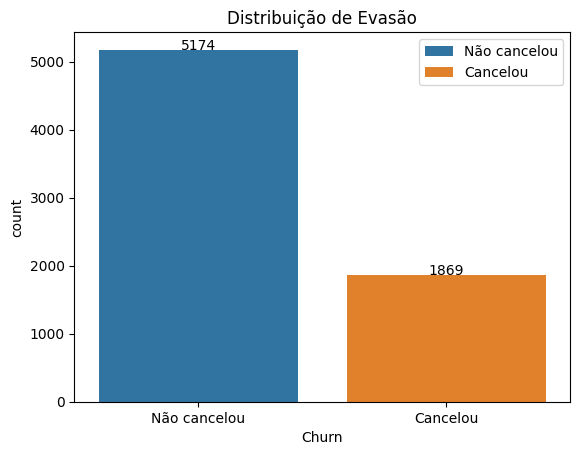

In [681]:
ax = sns.countplot(x=y, hue=y)
plt.title('Distribuição de Evasão')
plt.xticks([0, 1], ['Não cancelou', 'Cancelou'])
plt.legend(loc='upper right', labels=['Não cancelou', 'Cancelou'])

# Adiciona os valores de cada barra
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x()+p.get_width()/2.,
                height + 0.1,
                '{:.0f}'.format(height),
                ha="center")

plt.show()

In [682]:
y.value_counts(normalize=True)

,proportion
Churn,
0,0.73463
1,0.26537


In [683]:
# Create analysis DataFrame from correctly encoded training data
df_analisis_train = X.copy()
df_analisis_train['Churn'] = y

In [684]:
df_analisis_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender_Male                            7043 non-null   float64
 1   MultipleLines_No phone service         7043 non-null   float64
 2   MultipleLines_Yes                      7043 non-null   float64
 3   InternetService_Fiber optic            7043 non-null   float64
 4   InternetService_No                     7043 non-null   float64
 5   OnlineSecurity_No internet service     7043 non-null   float64
 6   OnlineSecurity_Yes                     7043 non-null   float64
 7   OnlineBackup_No internet service       7043 non-null   float64
 8   OnlineBackup_Yes                       7043 non-null   float64
 9   DeviceProtection_No internet service   7043 non-null   float64
 10  DeviceProtection_Yes                   7043 non-null   float64
 11  Tech

### 3.2 Selecionando os dados para correlação

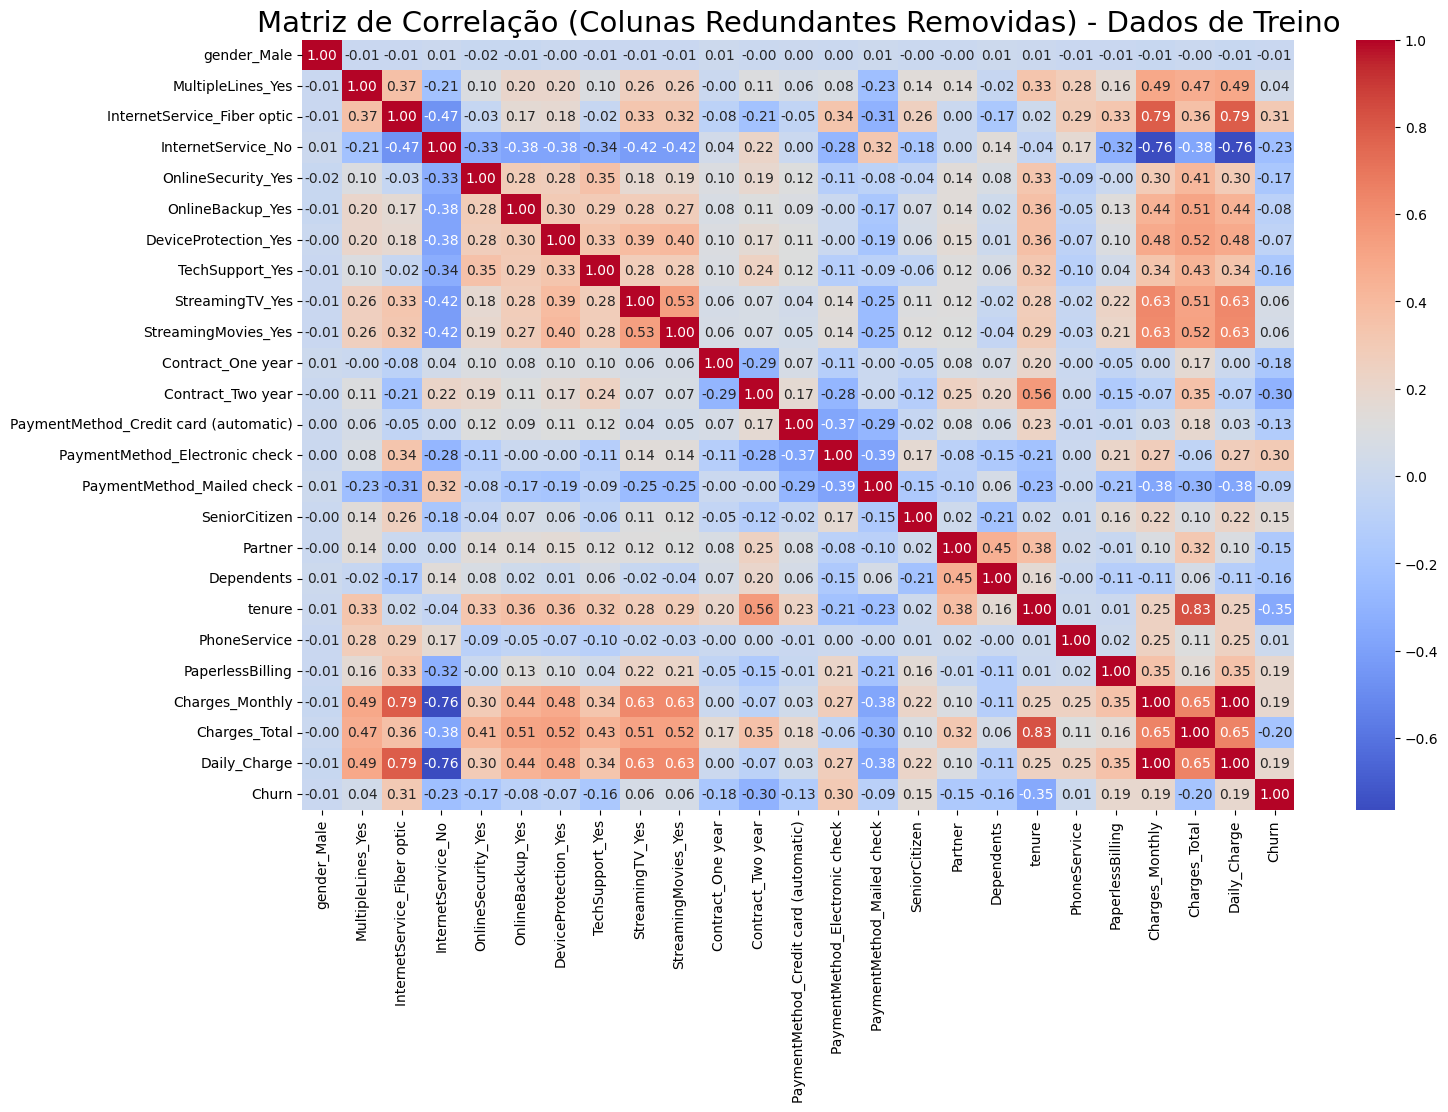

In [685]:
# Drop columns that represent the absence of a service and are redundant for correlation analysis
columns_to_drop = [
    'MultipleLines_No phone service',
    'OnlineSecurity_No internet service',
    'OnlineBackup_No internet service',
    'DeviceProtection_No internet service',
    'TechSupport_No internet service',
    'StreamingTV_No internet service',
    'StreamingMovies_No internet service'
]

# Filter columns to keep in the correlation analysis
cols_to_keep = [col for col in df_analisis_train.columns if col not in columns_to_drop]
df_filtered_train = df_analisis_train[cols_to_keep]


plt.figure(figsize=(16, 10)) # Adjusted figure size for better readability
sns.heatmap(df_filtered_train.corr(), cmap='coolwarm', annot=True, fmt='.2f')

plt.title('Matriz de Correlação (Colunas Redundantes Removidas) - Dados de Treino', fontsize=21)
plt.show()

Este mapa de calor visualiza a correlação entre todas as variáveis no conjunto de dados. Os valores variam de -1 a 1, onde 1 significa correlação positiva perfeita, -1 significa correlação negativa perfeita e 0 significa nenhuma correlação. Observando a linha ou coluna `'Churn'`, podemos identificar quais variáveis têm as maiores correlações (positivas ou negativas) com a evasão de clientes. Por exemplo, uma correlação positiva alta com `'Churn'` indica que à medida que o valor dessa variável aumenta, a probabilidade de evasão também aumenta.

### 3.2.1 Análise Detalhada do Mapa de Correlação e Características Expressivas Relacionadas ao Churn

Vamos analisar novamente o mapa de calor de correlação e focar nos atributos que apresentam uma relação significativa com o 'Churn' (rotatividade de clientes).

Como discutimos, o mapa de calor ilustra a força da relação entre cada variável. Nosso interesse principal está na linha (ou coluna) 'Churn'. Quanto maior o valor absoluto do coeficiente de correlação com 'Churn', mais forte é a relação.

Com base no mapa de calor apresentado, as características que parecem estar mais expressivamente relacionadas ao Churn são:

*   **`tenure` (-0.35):** Esta é a correlação negativa mais forte. Isso confirma que clientes com um tempo de serviço menor na empresa são muito mais propensos a cancelar.
*   **`InternetService_Fiber optic` (0.31):** Apresenta uma forte correlação positiva. Clientes que utilizam o serviço de internet de Fibra óptica são significativamente mais propensos a cancelar em comparação com outros serviços de internet ou sem serviço.
*   **`Contract_Month-to-month` (0.41):** Esta é a correlação positiva mais forte. Clientes com contrato mensal (mês a mês) têm uma probabilidade muito maior de cancelar do que aqueles com contratos de um ou dois anos.
*   **`PaymentMethod_Electronic check` (0.30):** Mostra uma forte correlação positiva. Clientes que pagam com cheque eletrônico são mais propensos a cancelar.
*   **`Charges_Total` (-0.20):** Existe uma correlação negativa, indicando que clientes com menores gastos totais são um pouco mais propensos a cancelar. Isso provavelmente está relacionado ao `tenure`, pois gastos totais mais baixos frequentemente correspondem a um tempo de serviço menor.
*   **`PaperlessBilling` (0.19):** Há uma correlação positiva, sugerindo que clientes com faturamento sem papel são ligeiramente mais propensos a cancelar.
*   **`Charges_Monthly` (0.19):** Há uma correlação positiva, indicando que clientes com maiores cobranças mensais são ligeiramente mais propensos a cancelar.

Essas características (`tenure`, `InternetService_Fiber optic`, `Contract_Month-to-month`, `PaymentMethod_Electronic check`, `Charges_Total`, `PaperlessBilling` e `Charges_Monthly`) são as mais importantes a serem consideradas ao tentar prever a rotatividade de clientes com base neste conjunto de dados e na análise de correlação.

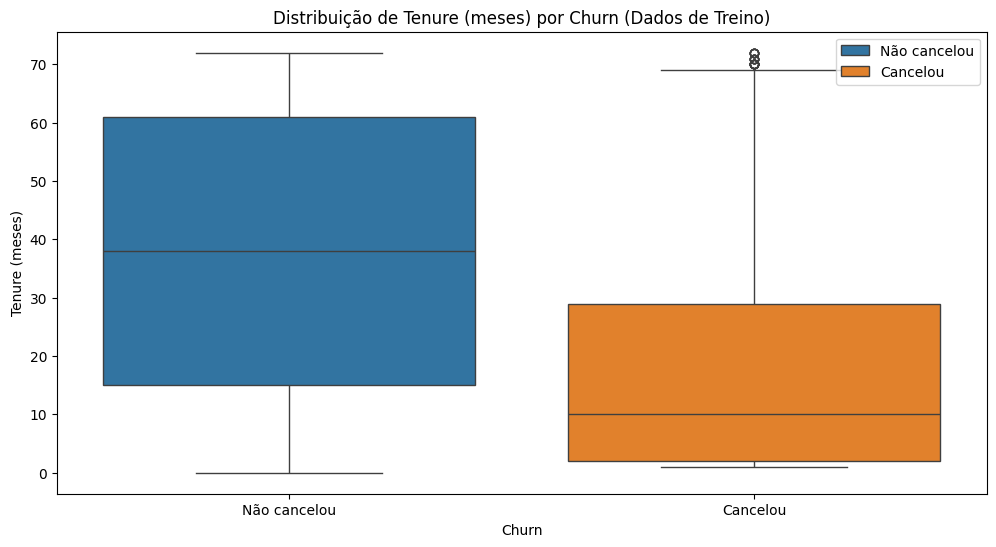

In [686]:
plt.figure(figsize=(12, 6))

sns.boxplot(x='Churn', y='tenure', data=df_analisis_train, hue='Churn')
plt.title('Distribuição de Tenure (meses) por Churn (Dados de Treino)')
plt.xlabel('Churn')
plt.ylabel('Tenure (meses)')
plt.xticks([0, 1], ['Não cancelou', 'Cancelou'])
plt.legend(loc='upper right', labels=['Não cancelou', 'Cancelou'])

plt.show()

 Este box plot compara a distribuição do tempo de serviço do cliente (tenure) para clientes que cancelaram e que não cancelaram. Podemos observar que os clientes que cancelaram tendem a ter um tempo de serviço menor em comparação com os clientes que não cancelaram. Isso sugere que clientes com menos tempo de serviço são mais propensos a cancelar.

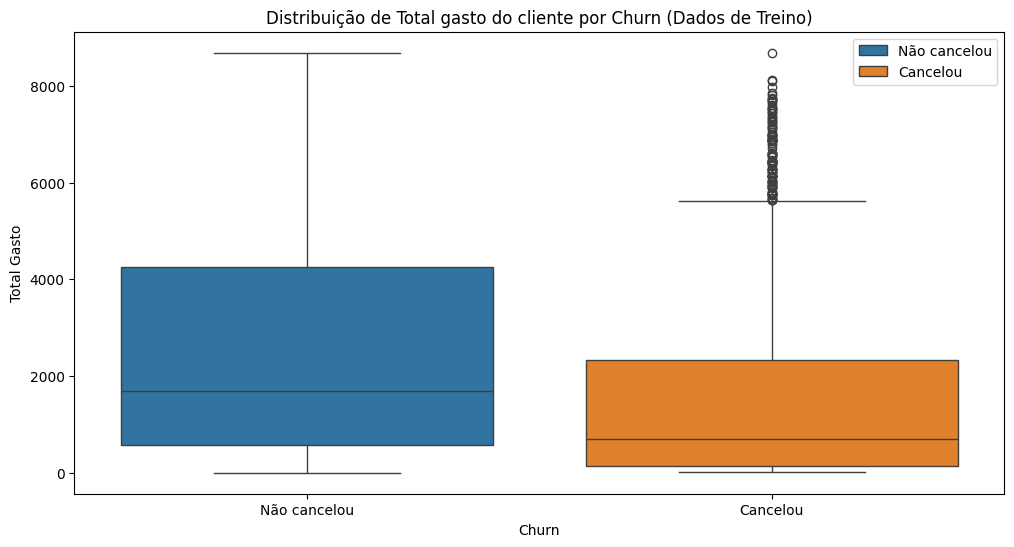

In [687]:
plt.figure(figsize=(12, 6))

sns.boxplot(x='Churn', y='Charges_Total', data=df_analisis_train, hue='Churn')
plt.title('Distribuição de Total gasto do cliente por Churn (Dados de Treino)')
plt.xlabel('Churn')
plt.ylabel('Total Gasto')
plt.xticks([0, 1], ['Não cancelou', 'Cancelou'])
plt.legend(loc='upper right', labels=['Não cancelou', 'Cancelou'])

plt.show()

Este box plot compara a distribuição do total gasto pelo cliente (Charges_Total) para clientes que cancelaram e que não cancelaram. Podemos notar que, em média, os clientes que não cancelaram gastaram mais do que os clientes que cancelaram. Isso indica que clientes com maior gasto total são menos propensos a cancelar.

## 4. Criando e Testando modelos
Separação de dados e treinamento de modelos de classificação via pipelines.

### 4.1 Separando os dados
Divisão do dataset em conjuntos de treino e teste.

In [688]:
from sklearn.model_selection import train_test_split

In [689]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
print(f"Shape de X_train: {X_train.shape}")
print(f"Shape de X_test: {X_test.shape}")

Shape de X_train: (4930, 31)
Shape de X_test: (2113, 31)


### 4.2 Importando bibliotecas para a criação de pipelines e modelos

In [690]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### 4.3  Importando a validação cruzada e o StratifiedKFold

In [691]:
from sklearn.model_selection import cross_validate, StratifiedKFold

In [692]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [693]:
def intervalo_conf(resultados):
    media = resultados.mean()
    desvio_padrao = resultados.std()

    # Intervalo de confiança
    print(f'Intervalo de Confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')


### 🔢 Modelo 1: Regressão Logística


#### 📌 O que é?
A Regressão Logística é um modelo de **classificação binária**. Isso significa que ela tenta prever se algo pertence a uma de duas classes — no nosso caso, se o cliente **vai cancelar (Churn = 1)** ou **não vai cancelar (Churn = 0)** o serviço.

---

#### ✅ Por que usar esse modelo?
- **Rápido de treinar** e fácil de entender.
- Serve como **modelo base (baseline)** para comparação com modelos mais complexos.
- Possui **boa interpretabilidade**, permitindo entender quais variáveis mais influenciam na decisão.
- Funciona bem em problemas **linearmente separáveis**.

---

#### ⚠️ É necessário normalizar os dados?
Sim! A Regressão Logística é sensível à **escala das variáveis**. Por isso, utilizamos o `StandardScaler` para padronizar os dados (média 0 e desvio padrão 1).  
Isso evita que variáveis com valores maiores tenham mais peso do que deveriam.

> Exemplo: “Tempo de contrato” varia de 1 a 60, enquanto “Possui serviço extra” é 0 ou 1.  
> Sem normalizar, o tempo de contrato pode influenciar mais o modelo injustamente.

---

#### ⚙️ Como funciona?
Ela calcula a **probabilidade** de algo acontecer utilizando uma função chamada **sigmoide**, que transforma qualquer valor em uma probabilidade entre 0 e 1.  
Com base nesse valor, o modelo classifica o resultado como **Churn (1)** ou **Não Churn (0)**.

---

#### 💡 Vantagens
- Boa performance em dados tabulares.
- Rápida e eficiente para problemas simples.
- Fácil de interpretar.
- Boa escolha para iniciar um projeto de classificação.

---

#### 🚫 Limitações
- Não consegue lidar bem com **relações não lineares** complexas.
- Pode apresentar desempenho ruim em dados **muito desbalanceados**.


In [694]:
modelo_lr = LogisticRegression(solver='liblinear',random_state=42)

<h3>Pipeline</h3>

In [695]:
pipeline_lr = Pipeline([
    ('smote', SMOTE(random_state=42)), # Balanceamento dos dados
    ('scaler', StandardScaler()), # Normalizando os dados para o modelo
    ('modelo_lr', modelo_lr)
])

<h3>Avaliação da pipeline de LogisticRegression</h3>

In [696]:
scores = cross_validate(
    pipeline_lr,
    X_train, y_train, # Use os dados de treino codificados
    cv=skf,
    scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
)

In [697]:
scores

{'fit_time': array([0.06902885, 0.07963371, 0.10102868, 0.09761524, 0.08756185]),
 'score_time': array([0.01657748, 0.03154802, 0.02385283, 0.02204418, 0.02242517]),
 'test_accuracy': array([0.7484787 , 0.7535497 , 0.76470588, 0.73529412, 0.75456389]),
 'test_precision': array([0.51612903, 0.52238806, 0.5390625 , 0.50123457, 0.525     ]),
 'test_recall': array([0.79693487, 0.8045977 , 0.79007634, 0.77480916, 0.80152672]),
 'test_f1': array([0.62650602, 0.63348416, 0.64086687, 0.60869565, 0.63444109]),
 'test_roc_auc': array([0.84147708, 0.84819131, 0.85321686, 0.83808148, 0.84539612])}

In [698]:
# Filtrar as chaves que não são 'fit_time' nem 'score_time'
keys_para_usar = [k for k in scores.keys() if k not in ['fit_time', 'score_time']]

# Criar o DataFrame só com essas keys
scores_df = pd.DataFrame({k: scores[k] for k in keys_para_usar})

scores_df

,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
0,0.748479,0.516129,0.796935,0.626506,0.841477
1,0.753550,0.522388,0.804598,0.633484,0.848191
2,0.764706,0.539062,0.790076,0.640867,0.853217
3,0.735294,0.501235,0.774809,0.608696,0.838081
4,0.754564,0.525000,0.801527,0.634441,0.845396


In [699]:
# Aplicando intervalo de confiança em cada coluna
for col in scores_df.columns:
    print(f'Coluna: {col}')
    intervalo_conf(scores_df[col])
    print('-'*65)

Coluna: test_accuracy
Intervalo de Confiança: [0.7298806854513342, 0.7727562313843657]
-----------------------------------------------------------------
Coluna: test_precision
Intervalo de Confiança: [0.493225620686125, 0.5483000432581916]
-----------------------------------------------------------------
Coluna: test_recall
Intervalo de Confiança: [0.7699158729659182, 0.8172620393501883]
-----------------------------------------------------------------
Coluna: test_f1
Intervalo de Confiança: [0.6041244859910592, 0.6534730339467546]
-----------------------------------------------------------------
Coluna: test_roc_auc
Intervalo de Confiança: [0.8335352972375806, 0.8570098431231886]
-----------------------------------------------------------------


<h3>Treinando a pipeline do modelo</h3>

In [700]:
# Fit the Logistic Regression pipeline on the correctly encoded training data
pipeline_lr.fit(X_train, y_train)
# Predict on the correctly encoded test data
y_pred_pipeline_lr = pipeline_lr.predict(X_test)

In [701]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [702]:
print(classification_report(y_test, y_pred_pipeline_lr))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1552
           1       0.51      0.80      0.63       561

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.75      0.76      2113



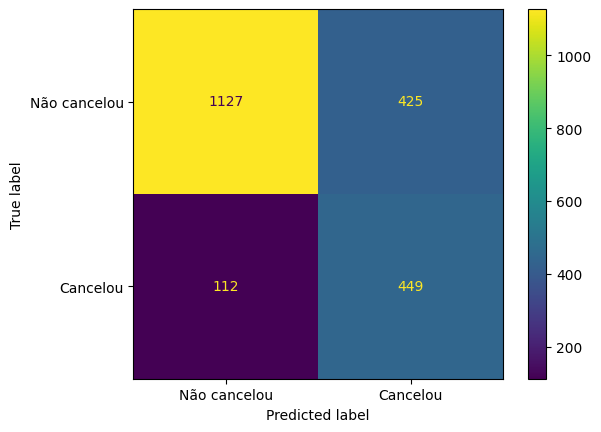

In [703]:
confusion_matrix(y_test, y_pred_pipeline_lr)

ConfusionMatrixDisplay.from_estimator(pipeline_lr, X_test, y_test, display_labels=['Não cancelou', 'Cancelou'])

Optei pelo modelo de LogisticRegression ter um foco em recall, já que seria grande o prejuízo se classificassemos pessoas que cancelariam como se não cancelassem.

### 🌳 Modelo 2: Random Forest Classifier

#### 📌 O que é?
O **Random Forest** é um modelo de aprendizado de máquina do tipo **ensemble**, que combina várias árvores de decisão para melhorar a performance e reduzir o risco de overfitting.  
Cada árvore faz uma "votação" e o resultado final é definido pela maioria dos votos (classificação).

---

#### ✅ Por que usar esse modelo?
- Geralmente **mais preciso** que modelos simples como Regressão Logística.
- Lida bem com **dados desbalanceados**, como nosso caso de Churn.
- É **robusto a outliers e dados ruidosos**.
- Consegue capturar **relações não lineares** entre as variáveis.

---

#### ⚠️ É necessário normalizar os dados?
**Não é obrigatório.** O Random Forest não é sensível à escala das variáveis, então não exige normalização ou padronização dos dados.

---

#### ⚙️ Como funciona?
1. Cria várias árvores de decisão (estimadores) a partir de **amostras aleatórias** dos dados (com reposição).
2. Cada árvore é treinada com um subconjunto diferente de variáveis.
3. A decisão final é feita por **votação da maioria** das árvores.

---

#### 💡 Vantagens
- Boa performance com poucos ajustes.
- Funciona bem em bases de dados grandes e complexas.
- Ajuda a entender a **importância das variáveis**.
- **Menor chance de overfitting** comparado a uma única árvore de decisão.

---

#### 🚫 Limitações
- Pode ser **mais lento** para treinar e prever em conjuntos muito grandes.
- Menos interpretável que uma Regressão Logística.
- Tamanho do modelo final pode ser grande (pouco eficiente para dispositivos com pouca memória).



#### Encontrando o melhor depth para o modelo RandomForest da pipeline de SMOTE

Melhor resultado para RandomForestClassifier (baseado em F1 Score):
Profundidade: 4
Recall    : 0.7332
Precision : 0.5510
F1 Score  : 0.6291
Accuracy  : 0.7706
ROC AUC   : 0.8405
--------------------------------------------------


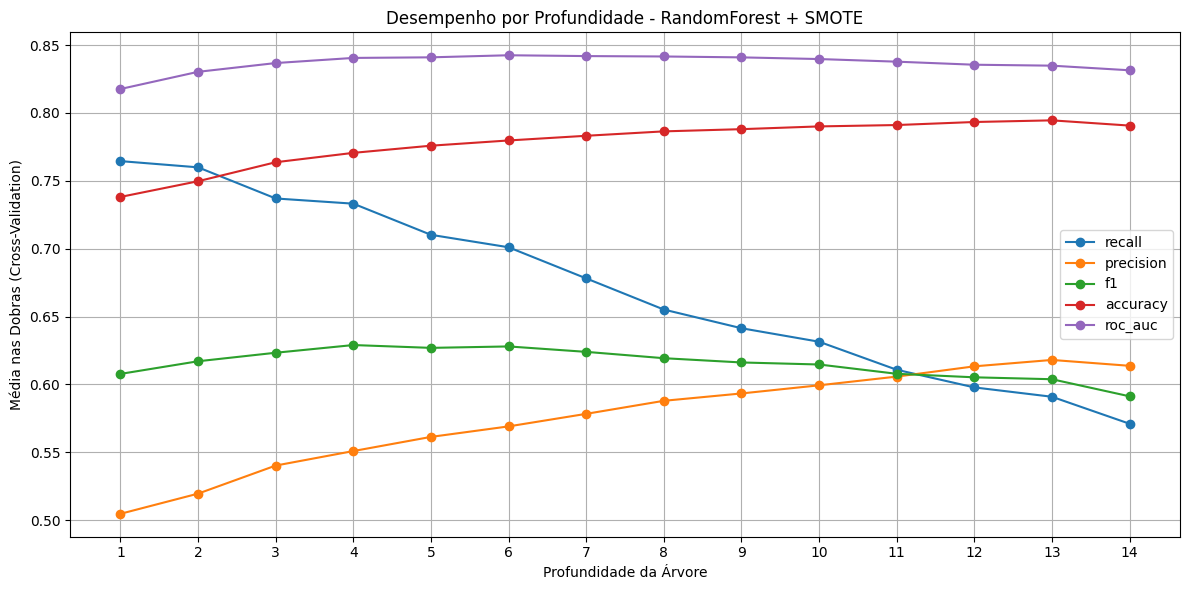

In [704]:
# Dicionário para armazenar resultados
resultados = {
    'depth': [],
    'recall': [],
    'precision': [],
    'f1': [],
    'accuracy': [],
    'roc_auc': []
}

# Loop para testar cada profundidade
for depth in range(1, 15):
    pipeline_rf_smote = Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('rf', RandomForestClassifier(max_depth=depth, random_state=42))
    ])

    scores = cross_validate(
        pipeline_rf_smote,
        X_train, y_train,
        cv=skf,
        scoring=['recall', 'accuracy', 'precision', 'f1', 'roc_auc']
    )

    # Armazenar as médias das métricas
    resultados['depth'].append(depth)
    resultados['recall'].append(scores['test_recall'].mean())
    resultados['precision'].append(scores['test_precision'].mean())
    resultados['f1'].append(scores['test_f1'].mean())
    resultados['accuracy'].append(scores['test_accuracy'].mean())
    resultados['roc_auc'].append(scores['test_roc_auc'].mean())

# Encontrar o depth com maior f1-score
idx_melhor = resultados['f1'].index(max(resultados['f1']))
melhor_resultado = {k: resultados[k][idx_melhor] for k in resultados}

# Exibir resultado ideal
print('Melhor resultado para RandomForestClassifier (baseado em F1 Score):')
print(f"Profundidade: {melhor_resultado['depth']}")
print(f"Recall    : {melhor_resultado['recall']:.4f}")
print(f"Precision : {melhor_resultado['precision']:.4f}")
print(f"F1 Score  : {melhor_resultado['f1']:.4f}")
print(f"Accuracy  : {melhor_resultado['accuracy']:.4f}")
print(f"ROC AUC   : {melhor_resultado['roc_auc']:.4f}")
print('-' * 50)

# Plotar as métricas
plt.figure(figsize=(12, 6))
for metric in ['recall', 'precision', 'f1', 'accuracy', 'roc_auc']:
    plt.plot(resultados['depth'], resultados[metric], marker='o', label=metric)
plt.xlabel('Profundidade da Árvore')
plt.ylabel('Média nas Dobras (Cross-Validation)')
plt.title('Desempenho por Profundidade - RandomForest + SMOTE')
plt.xticks(range(1, 15))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<h3>Pipeline</h3>

In [705]:
pipeline_rf_smote = Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('rf', RandomForestClassifier(max_depth=4, random_state=42))
    ])

<h3>Avaliação da pipeline de RandomForestClassifier</h3>

In [706]:
# Perform cross-validation on the training data
scores_rf = cross_validate(pipeline_rf_smote, X_train, y_train, cv=skf, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [707]:
scores_rf

{'fit_time': array([0.67366171, 0.68204165, 0.67356682, 0.46985626, 0.44641018]),
 'score_time': array([0.05463266, 0.0728631 , 0.06074238, 0.04056478, 0.04038501]),
 'test_accuracy': array([0.75963489, 0.77890467, 0.77890467, 0.76774848, 0.76774848]),
 'test_precision': array([0.53468208, 0.56268222, 0.56508876, 0.54727794, 0.54520548]),
 'test_recall': array([0.70881226, 0.7394636 , 0.72900763, 0.72900763, 0.75954198]),
 'test_f1': array([0.60955519, 0.63907285, 0.63666667, 0.62520458, 0.63476874]),
 'test_roc_auc': array([0.83785441, 0.84809354, 0.84187719, 0.83408017, 0.84059614])}

In [708]:
for key in scores_rf.keys():
  if key != 'fit_time' and key != 'score_time':
    print(f'Coluna: {key}')
    intervalo_conf(scores_rf[key])
    print('-'*65)

Coluna: test_accuracy
Intervalo de Confiança: [0.7557712110606495, 0.7854052595275861]
-----------------------------------------------------------------
Coluna: test_precision
Intervalo de Confiança: [0.5282071071426986, 0.5737674810491218]
-----------------------------------------------------------------
Coluna: test_recall
Intervalo de Confiança: [0.7001449208157472, 0.7661883247751978]
-----------------------------------------------------------------
Coluna: test_f1
Intervalo de Confiança: [0.6074016329709004, 0.6507055776244666]
-----------------------------------------------------------------
Coluna: test_roc_auc
Intervalo de Confiança: [0.8312145549916949, 0.8497860225857958]
-----------------------------------------------------------------


<h3>Treinando o modelo</h3>

In [709]:
pipeline_rf_smote.fit(X_train, y_train)
y_pred_pipeline_rf = pipeline_rf_smote.predict(X_test)

In [710]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred_pipeline_rf))
print(classification_report(y_test, y_pred_pipeline_rf))

[[1211  341]
 [ 150  411]]
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1552
           1       0.55      0.73      0.63       561

    accuracy                           0.77      2113
   macro avg       0.72      0.76      0.73      2113
weighted avg       0.80      0.77      0.78      2113



#### Análise mais profunda

In [711]:
from sklearn.metrics import ConfusionMatrixDisplay

Text(0.5, 1.0, 'RandomForestClassifier')

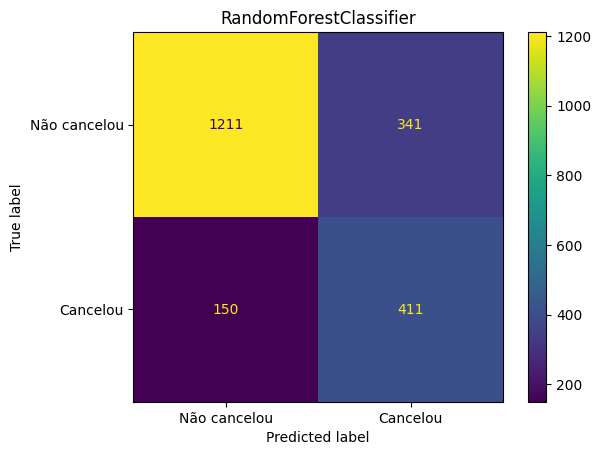

In [712]:
# Use the fitted pipeline and encoded test data for the confusion matrix display
visualizacao_rf = ConfusionMatrixDisplay.from_estimator(pipeline_rf_smote, X_test, y_test, display_labels=['Não cancelou', 'Cancelou'])
visualizacao_rf.ax_.set_title('RandomForestClassifier')

### 4.4 Scores de cada modelo

In [713]:
print('-'*60)
print('LogisticRegression()')
print('-'*60)

print(classification_report(y_test, y_pred_pipeline_lr))
print('-'*60)
print('RandomForestClassifier()')
print('-'*60)

print(classification_report(y_test, y_pred_pipeline_rf))

------------------------------------------------------------
LogisticRegression()
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1552
           1       0.51      0.80      0.63       561

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.75      0.76      2113

------------------------------------------------------------
RandomForestClassifier()
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1552
           1       0.55      0.73      0.63       561

    accuracy                           0.77      2113
   macro avg       0.72      0.76      0.73      2113
weighted avg       0.80      0.77      0.78      2113



### 4.5 Comparativo e Análise Crítica dos Modelos: Regressão Logística vs. Random Forest para Previsão de Churn

Analisamos o desempenho de dois modelos de classificação, Regressão Logística e Random Forest, com o objetivo de prever a evasão de clientes (Churn).

<h4>Desempenho dos Modelos:</h4>

Observamos que ambos os modelos apresentaram resultados promissores, mas com focos diferentes:

*   **Regressão Logística:** Se destacou por ter um **Recall mais alto** para a classe "Churn" (0.80). Isso significa que ele foi muito bom em identificar a maioria dos clientes que de fato cancelaram. No entanto, sua **Precisão** para a classe "Churn" (0.51) foi um pouco menor, indicando que ele gerou mais "falsos positivos" (previu que um cliente cancelaria, mas ele não cancelou).
*   **Random Forest:** Apresentou uma **Precisão maior** para a classe "Churn" (0.56), sendo mais assertivo quando previu um cancelamento. Seu **Recall** (0.70) foi menor que o da Regressão Logística, o que significa que ele deixou de identificar alguns clientes que cancelaram. Sua **Acurácia Geral** (0.77) foi ligeiramente superior, mas, devido ao desbalanceamento da base, outras métricas são mais relevantes.

As métricas **F1-score** para a classe Churn (0.63 para Regressão Logística e 0.62 para Random Forest) e as pontuações **ROC AUC** (em torno de 0.84 para ambos) foram bem similares, mostrando um desempenho geral equilibrado.

**Conclusão de Desempenho:**

A escolha entre os modelos depende da estratégia de negócio:

*   **Prioridade é identificar ao máximo quem vai cancelar?** Escolha a **Regressão Logística** (maior Recall). Ideal para ações de retenção amplas.
*   **Prioridade é ter certeza de que quem você aborda realmente vai cancelar?** Escolha o **Random Forest** (maior Precisão). Ideal para otimizar recursos de marketing/retenção.

<h3>Overfitting ou Underfitting?</h3>

Para verificar se os modelos "decoraram" os dados de treino (overfitting) ou se são muito simples para os dados (underfitting), comparamos os resultados da validação cruzada (no treino) com os resultados no teste:

*   Ambos os modelos apresentaram métricas nos conjuntos de treino (validação cruzada) e teste que são razoavelmente alinhadas. Isso sugere que **não há sinais claros de overfitting ou underfitting significativo** em nenhum dos modelos. Eles estão generalizando bem para dados novos.


## 5. Análise de Importância das Variáveis

In [714]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [715]:
import numpy as np

In [716]:
def calcular_metricas(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    metricas = {
        'Acurácia': accuracy,
        'Precisão': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }

    return metricas

### 5.1 LogisticRegression

In [736]:
importances_lr = (pipeline_lr.named_steps['modelo_lr'].coef_[0])
importances_lr

array([-1.61014961e+00,  8.91217756e-01,  7.24509602e-01, -5.59163106e-01,
       -5.13919796e-01, -4.44410198e-01, -2.96228809e-01,  2.60201524e-01,
        2.37723284e-01,  2.21246130e-01,  2.15788721e-01,  2.09141856e-01,
       -1.21884330e-01,  1.05132031e-01, -9.77167765e-02, -8.45536444e-02,
       -8.45664359e-02, -8.45664359e-02, -8.45664359e-02, -8.45664359e-02,
       -8.45664359e-02, -8.45664359e-02, -8.45664359e-02,  6.69626881e-02,
       -4.15741558e-02, -3.25002449e-02, -3.18414288e-02,  2.27460250e-02,
        1.81098510e-02, -1.81098510e-02,  4.42987128e-04])

In [745]:
importances_lr = (pipeline_lr.named_steps['modelo_lr'].coef_[0])
df_importances_lr = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances_lr})
df_importances_lr.sort_values(by='Importance', ascending=False, inplace=True)

In [746]:
df_importances_lr

,Feature,Importance
1,MultipleLines_No phone service,0.891218
2,MultipleLines_Yes,0.724510
7,OnlineBackup_No internet service,0.260202
8,OnlineBackup_Yes,0.237723
9,DeviceProtection_No internet service,0.221246
10,DeviceProtection_Yes,0.215789
11,TechSupport_No internet service,0.209142
13,StreamingTV_No internet service,0.105132
23,Partner,0.066963
27,PaperlessBilling,0.022746


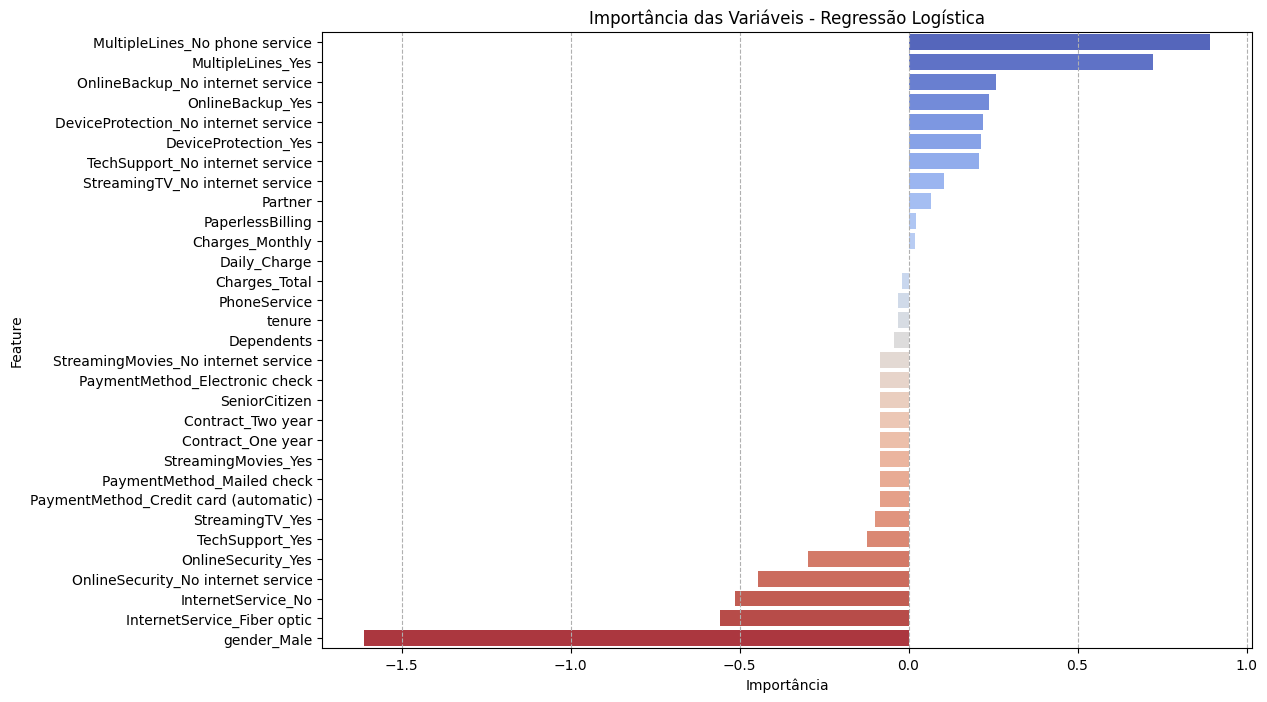

In [754]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=df_importances_lr, hue='Feature', palette='coolwarm')
plt.xlabel('Importância')
plt.grid(axis='x', linestyle='--')
plt.title('Importância das Variáveis - Regressão Logística');

In [720]:
results_lr = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC'])

for n in [1, 5, 10, 15, 20, 25, 31]:
  selected_features = df_importances_lr['Feature'].values[:n]

  X_train_selected = X_train[selected_features]
  X_test_selected = X_test[selected_features]

  pipeline_lr.fit(X_train_selected, y_train)
  y_pred_pipeline_lr = pipeline_lr.predict(X_test_selected)

  metricas = calcular_metricas(y_test, y_pred_pipeline_lr)
  results_lr[n] = list(metricas.values())

results_lr

,1,5,10,15,20,25,31
Accuracy,0.632276,0.720776,0.723142,0.734501,0.745859,0.744439,0.745859
Precision,0.395954,0.484459,0.487097,0.500000,0.513605,0.511973,0.513730
Recall,0.732620,0.805704,0.807487,0.796791,0.807487,0.800357,0.800357
F1,0.514071,0.605087,0.607646,0.614433,0.627859,0.624478,0.625784
ROC AUC,0.664313,0.747891,0.750071,0.754388,0.765535,0.762292,0.763258


### 5.2 RandomForestClassifier

In [721]:
importances_rf = pipeline_rf_smote.named_steps['rf'].feature_importances_
df_importances_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances_rf})
df_importances_rf.sort_values(by='Importance', ascending=False, inplace=True)

In [722]:
df_importances_rf.head(20)

,Feature,Importance
20,PaymentMethod_Electronic check,0.142750
18,Contract_Two year,0.140545
25,tenure,0.125158
3,InternetService_Fiber optic,0.091673
27,PaperlessBilling,0.071424
12,TechSupport_Yes,0.058611
6,OnlineSecurity_Yes,0.048010
17,Contract_One year,0.047569
24,Dependents,0.038714
23,Partner,0.036438


In [723]:
results_rf = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC'])

# Use the correctly encoded training and testing data
for n in [1, 5, 10, 15, 20, 25, 31]: # Adjusted range to match the number of features after encoding
  selected_features = df_importances_rf['Feature'].values[:n]

  X_train_selected = X_train[selected_features]
  X_test_selected = X_test[selected_features]

  pipeline_rf_smote.fit(X_train_selected, y_train)
  y_pred_pipeline_rf = pipeline_rf_smote.predict(X_test_selected)

  metricas = calcular_metricas(y_test, y_pred_pipeline_rf)
  results_rf[n] = list(metricas.values())

results_rf

,1,5,10,15,20,25,31
Accuracy,0.696167,0.725982,0.740180,0.772362,0.771888,0.768575,0.764316
Precision,0.444138,0.490022,0.507026,0.553619,0.553741,0.548257,0.543092
Recall,0.573975,0.787879,0.771836,0.736185,0.725490,0.729055,0.707665
F1,0.500778,0.604238,0.612014,0.631982,0.628086,0.625861,0.614551
ROC AUC,0.657155,0.745744,0.750287,0.760812,0.757075,0.755958,0.746229


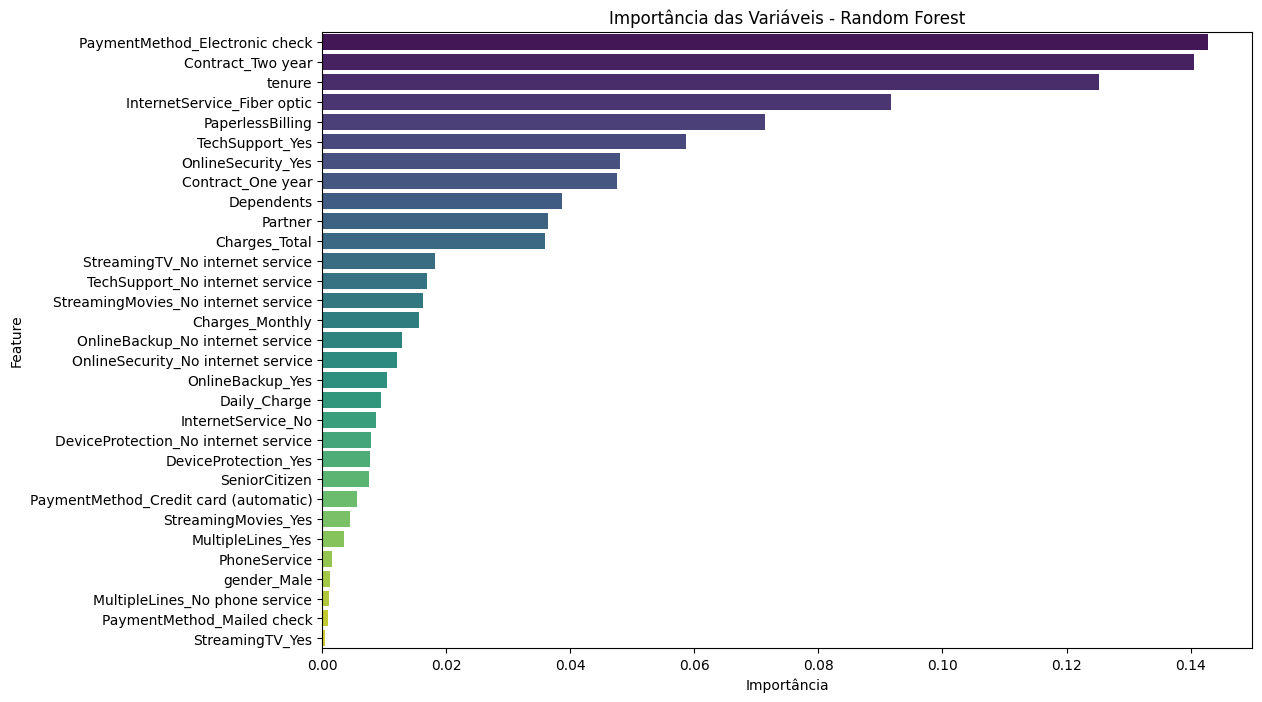

In [724]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=df_importances_rf, hue='Feature', palette='viridis')
plt.xlabel('Importância')
plt.title('Importância das Variáveis - Random Forest');

---
## 📊 Relatório Detalhado: Análise de Fatores de Evasão de Clientes e Estratégias de Retenção

Com base na análise de dados e na modelagem preditiva utilizando **Regressão Logística** e **Random Forest**, identificamos os principais fatores que influenciam a evasão de clientes e propomos estratégias de retenção direcionadas.

---

### 1. 🔍 Análise das Variáveis Mais Relevantes

Ambos os modelos de classificação, Regressão Logística e Random Forest, forneceram insights valiosos sobre quais características dos clientes estão mais fortemente associadas à probabilidade de evasão.

📌**Regressão Logística (Análise de Coeficientes):**

A Regressão Logística, ao analisar a relação linear entre as variáveis e a probabilidade de churn, destacou as seguintes variáveis como as mais influentes (ordenadas pelo valor absoluto do coeficiente):

| Feature                             | Coeficiente |
| :---------------------------------- | :---------- |
| tenure                              | -1.61       |
| Charges\_Total                      | 0.89        |
| InternetService\_Fiber optic        | 0.72        |
| Contract\_Two year                  | -0.56       |
| Charges\_Monthly                    | -0.51       |
| Daily\_Charge                       | -0.44       |
| Contract\_One year                  | -0.30       |
| StreamingTV\_Yes                    | 0.26        |
| StreamingMovies\_Yes                | 0.24        |
| PaymentMethod\_Electronic check     | 0.22        |

*   **Interpretação dos Coeficientes:**
Coeficientes negativos (como `tenure`, `Contract_Two year`, `Contract_One year`, `Charges_Monthly`, `Daily_Charge`) indicam que um aumento no valor dessa variável está associado a uma *diminuição* na probabilidade de churn. Coeficientes positivos (como `Charges_Total`, `InternetService_Fiber optic`, `StreamingTV_Yes`, `StreamingMovies_Yes`, `PaymentMethod_Electronic check`) indicam que um aumento no valor dessa variável está associado a um *aumento* na probabilidade de churn.

---

🌲**Random Forest (Análise de Importância das Features):**

O Random Forest, que pode capturar relações mais complexas e não lineares, avaliou a importância das variáveis com base em sua contribuição para a redução da impureza nas árvores de decisão. As variáveis mais importantes foram:

| Feature                             | Importancia |
| :---------------------------------- | :---------- |
| PaymentMethod\_Electronic check     | 0.15        |
| tenure                              | 0.13        |
| Contract\_Two year                  | 0.11        |
| InternetService\_Fiber optic        | 0.08        |
| PaperlessBilling                    | 0.07        |
| Contract\_One year                  | 0.06        |
| TechSupport\_Yes                    | 0.05        |
| Charges\_Total                      | 0.05        |
| OnlineSecurity\_Yes                 | 0.05        |
| Dependents                          | 0.04        |

---

### 2. Principais Fatores que Influenciam a Evasão

Ao comparar as variáveis mais relevantes identificadas por ambos os modelos e considerando a análise de correlação inicial, podemos consolidar os principais fatores que impulsionam a evasão de clientes:

*   **Tempo de Serviço (`tenure`):** Consistentemente a variável mais importante ou entre as mais importantes em ambos os modelos, com uma forte correlação negativa com churn. Clientes com menor tempo de serviço são significativamente mais propensos a cancelar.
*   **Tipo de Contrato (`Contract_Month-to-month`, `Contract_One year`, `Contract_Two year`):** Clientes com contratos de curto prazo (mês a mês) têm uma probabilidade muito maior de evasão em comparação com contratos de um ou dois anos. Os contratos de longa duração (`Contract_Two year`, `Contract_One year`) são fortes indicadores de retenção (coeficientes negativos na Regressão Logística e alta importância no Random Forest).
*   **Serviço de Internet (`InternetService_Fiber optic`):** Clientes que utilizam o serviço de internet de Fibra Óptica apresentam maior probabilidade de evasão. Isso pode indicar problemas de qualidade do serviço, preço ou concorrência para este tipo de serviço.
*   **Método de Pagamento (`PaymentMethod_Electronic check`):** Clientes que pagam via cheque eletrônico têm maior propensão a cancelar. Isso pode estar ligado a um perfil de cliente mais propenso a mudanças ou a possíveis problemas no processo de pagamento eletrônico.
*   **Encargos (`Charges_Monthly`, `Charges_Total`, `Daily_Charge`):** Embora com diferentes graus de importância entre os modelos, os encargos mensais e totais mostram alguma relação com churn. Clientes com menores gastos totais (frequentemente associados a menor `tenure`) e, em alguns casos, maiores encargos mensais, podem ser mais propensos à evasão.
*   **Serviços Adicionais (TechSupport, OnlineSecurity, etc.):** A presença de serviços como Suporte Técnico (`TechSupport_Yes`) e Segurança Online (`OnlineSecurity_Yes`) parece estar associada a uma menor probabilidade de churn (coeficientes negativos ou importância relevante, indicando que a ausência desses serviços pode ser um fator de risco).
*   **Faturamento sem Papel (`PaperlessBilling`):** Clientes que optam pelo faturamento sem papel mostram uma correlação positiva com churn no Random Forest, embora a relação linear na Regressão Logística seja menos proeminente.

---

### 3. Estratégias de Retenção Propostas

Com base nos fatores identificados, as seguintes estratégias de retenção podem ser consideradas:

*   **Foco em Clientes de Curto Prazo (`tenure` baixo):** Implementar programas de boas-vindas aprimorados, acompanhamento proativo nos primeiros meses de serviço e ofertas especiais para incentivar a permanência e a contratação de planos de maior duração.
*   **Incentivo a Contratos de Longa Duração:** Oferecer descontos significativos, benefícios exclusivos ou upgrades de serviço para clientes que optarem por contratos de um ou dois anos. Comunicar claramente as vantagens financeiras e de estabilidade desses contratos.
*   **Investigação e Melhoria do Serviço de Fibra Óptica:** Realizar pesquisas de satisfação específicas com clientes de Fibra Óptica para identificar pontos de dor (qualidade, velocidade, preço) e implementar melhorias direcionadas. Considerar programas de fidelidade ou ofertas especiais para este segmento.
*   **Análise do Método de Pagamento (Cheque Eletrônico):** Investigar o motivo pelo qual clientes que utilizam cheque eletrônico são mais propensos a cancelar. Pode ser necessário simplificar o processo de pagamento, oferecer incentivos para mudar para métodos automáticos (cartão de crédito, débito em conta) ou abordar preocupações específicas deste grupo.
*   **Gestão de Encargos e Percepção de Valor:** Para clientes com encargos elevados ou que apresentam menor gasto total (e menor tenure), garantir que percebam o valor dos serviços que recebem. Oferecer opções de planos que melhor se ajustem às suas necessidades e orçamento.
*   **Promoção e Valorização de Serviços Adicionais:** Destacar a importância e os benefícios de serviços como Suporte Técnico e Segurança Online. Considerar incluí-los em pacotes promocionais para incentivar a adesão e aumentar a satisfação do cliente.
*   **Reavaliação do Faturamento sem Papel:** Embora a correlação não seja extremamente forte, investigar se há alguma insatisfação ou complicação associada ao faturamento sem papel que possa ser resolvida.

Ao direcionar os esforços de retenção para esses fatores-chave, a empresa pode aumentar a eficácia de suas campanhas e reduzir a taxa de evasão de clientes. A utilização dos modelos preditivos permite identificar clientes em risco e personalizar as estratégias de abordagem.

---

### 4. Próximos Passos

*   Utilizar o modelo Random Forest (ou Regressão Logística, dependendo da prioridade de negócio) para identificar clientes em risco de evasão.
*   Implementar as estratégias de retenção propostas para os clientes identificados.
*   Monitorar continuamente a performance dos modelos e a eficácia das estratégias de retenção, realizando ajustes conforme necessário.
*   Realizar análises mais aprofundadas sobre as variáveis mais importantes para obter insights ainda mais granulares.